In [4]:
#K.SAI CHANDANA REDDY
#CSEB
#BL.EN.U4CSE21083
#ML LAB 8

In [13]:
#A1
#Importing dataset
data = [
    ("<=30", "high", "no", "fair", "no"),
    ("<=30", "high", "no", "excellent", "no"),
    ("31...40", "high", "no", "fair", "yes"),
    (">40", "medium", "no", "fair", "yes"),
    (">40", "low", "yes", "fair", "yes"),
    (">40", "low", "yes", "excellent", "no"),
    ("31...40", "low", "yes", "excellent", "yes"),
    ("<=30", "medium", "no", "fair", "no"),
    ("<=30", "low", "yes", "fair", "yes"),
    (">40", "medium", "yes", "fair", "yes"),
    ("<=30", "medium", "yes", "excellent", "yes"),
    ("31...40", "medium", "no", "excellent", "yes"),
    ("31...40", "high", "yes", "fair", "yes"),
    (">40", "medium", "no", "excellent", "no"),
]
# Counting occurrences of each class by iterating
class_counts = {}
for _, _, _, _, label in data:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1
# Calculating  prior probabilities ofall classes
total_samples = len(data)
prior_probabilities = {label: count / total_samples for label, count in class_counts.items()}
# Printing prior probabilities
for label, prior_prob in prior_probabilities.items():
    print(f"Prior Probability for class '{label}': {prior_prob:.2%}")


Prior Probability for class 'no': 35.71%
Prior Probability for class 'yes': 64.29%


In [11]:
#A2
#Importing the libraries
import pandas as pd
from sklearn.neighbors import KernelDensity
# Loading the dataset 
df = pd.read_csv('lab4.csv')
# Selecting features and target variable
features = df[['age', 'income', 'student', 'credit_rating']]
target = df['buys_computer']
# Encoding categorical variables
features_encoded = pd.get_dummies(features)
# Creating dictionary to store class conditional densities
class_conditional_densities = {}
# Calculating class conditional densities for each feature
for class_label in target.unique():
    instances = features_encoded[target == class_label]
    for feature in features_encoded.columns:
        kde = KernelDensity(bandwidth=0.7) 
        kde.fit(instances[[feature]])
        class_conditional_densities[(class_label, feature)] = kde
# Printing the class conditional densities
for key, kde in class_conditional_densities.items():
    print(f"Class: {key[0]}, Feature: {key[1]}, Density: {kde.score_samples(features_encoded[[key[1]]])}")
# Checking for zero values
zero_densities = [(class_label, feature) for (class_label, feature), kde in class_conditional_densities.items()
                  if any(density == float('-inf') for density in kde.score_samples(features_encoded[[feature]]))]
# Displaing features and classes with zero densities
print("\nFeatures and Classes with Zero Densities:")
print(zero_densities)

Class: no, Feature: age_31...40, Density: [-0.56226359 -0.56226359 -1.58267175 -0.56226359 -0.56226359 -0.56226359
 -1.58267175 -0.56226359 -0.56226359 -0.56226359 -0.56226359 -1.58267175
 -1.58267175 -0.56226359]
Class: no, Feature: age_<=30, Density: [-0.85773712 -0.85773712 -1.04633584 -1.04633584 -1.04633584 -1.04633584
 -1.04633584 -0.85773712 -0.85773712 -1.04633584 -0.85773712 -1.04633584
 -1.04633584 -1.04633584]
Class: no, Feature: age_>40, Density: [-0.85773712 -0.85773712 -0.85773712 -1.04633584 -1.04633584 -1.04633584
 -0.85773712 -0.85773712 -0.85773712 -1.04633584 -0.85773712 -0.85773712
 -0.85773712 -1.04633584]
Class: no, Feature: income_high, Density: [-1.04633584 -1.04633584 -1.04633584 -0.85773712 -0.85773712 -0.85773712
 -0.85773712 -0.85773712 -0.85773712 -0.85773712 -0.85773712 -0.85773712
 -1.04633584 -0.85773712]
Class: no, Feature: income_low, Density: [-0.69912675 -0.69912675 -0.69912675 -0.69912675 -1.27896965 -1.27896965
 -1.27896965 -0.69912675 -1.27896965 

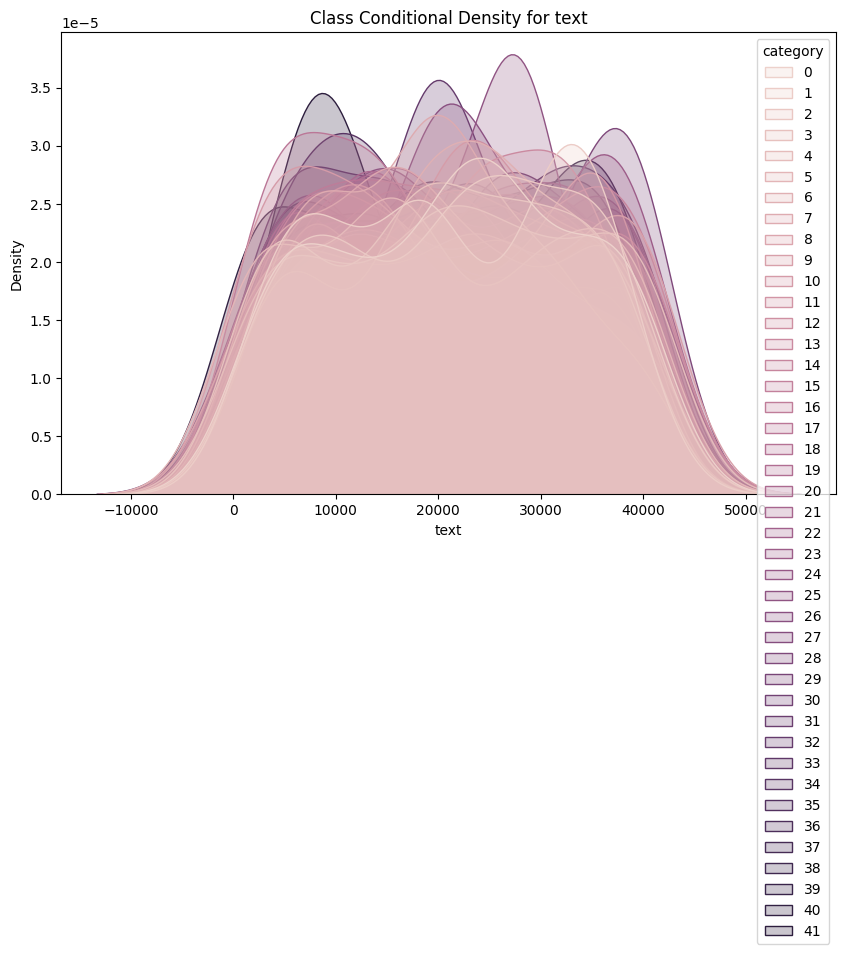

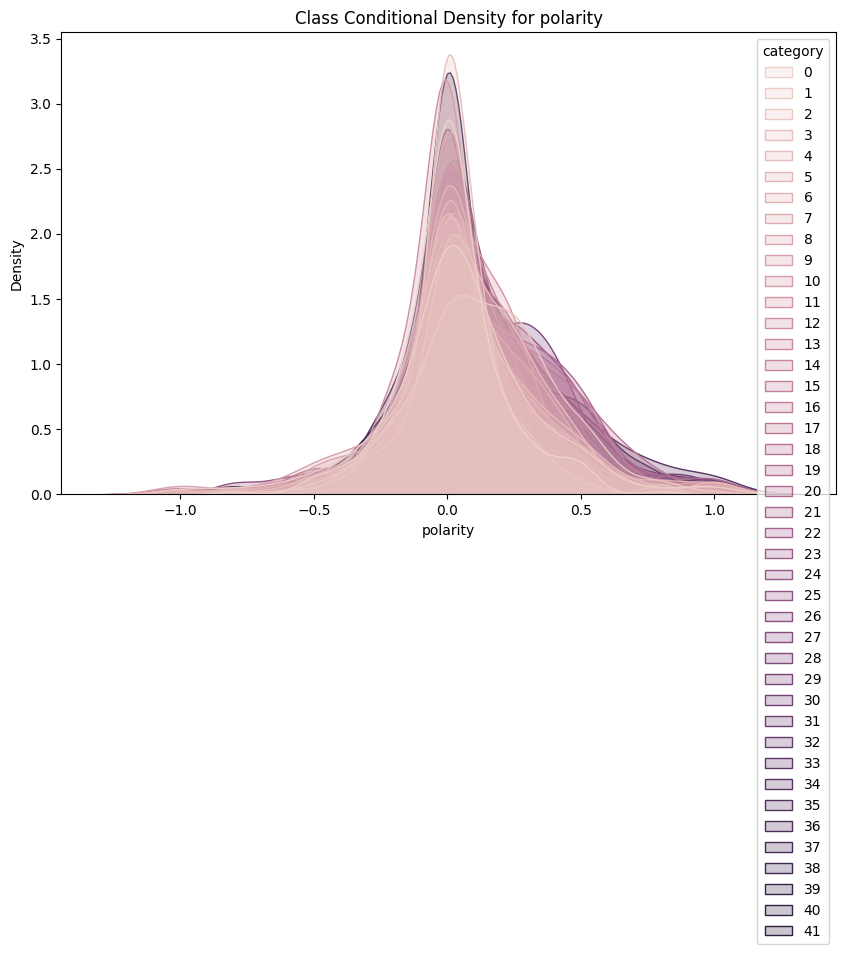

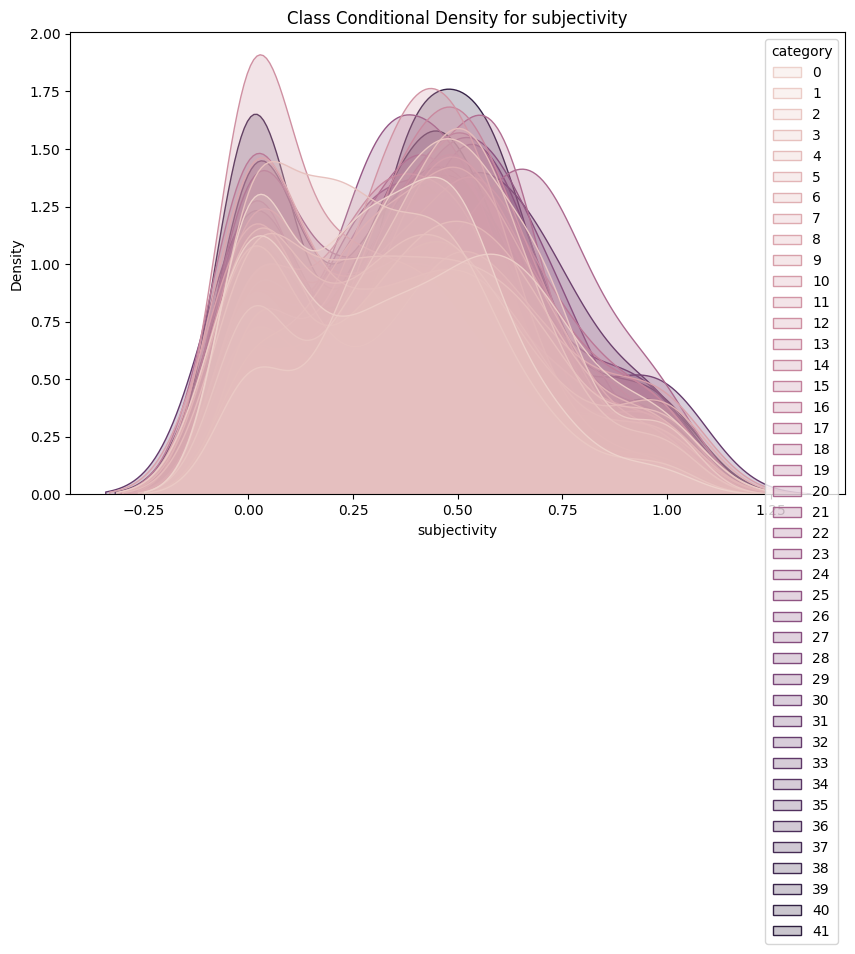

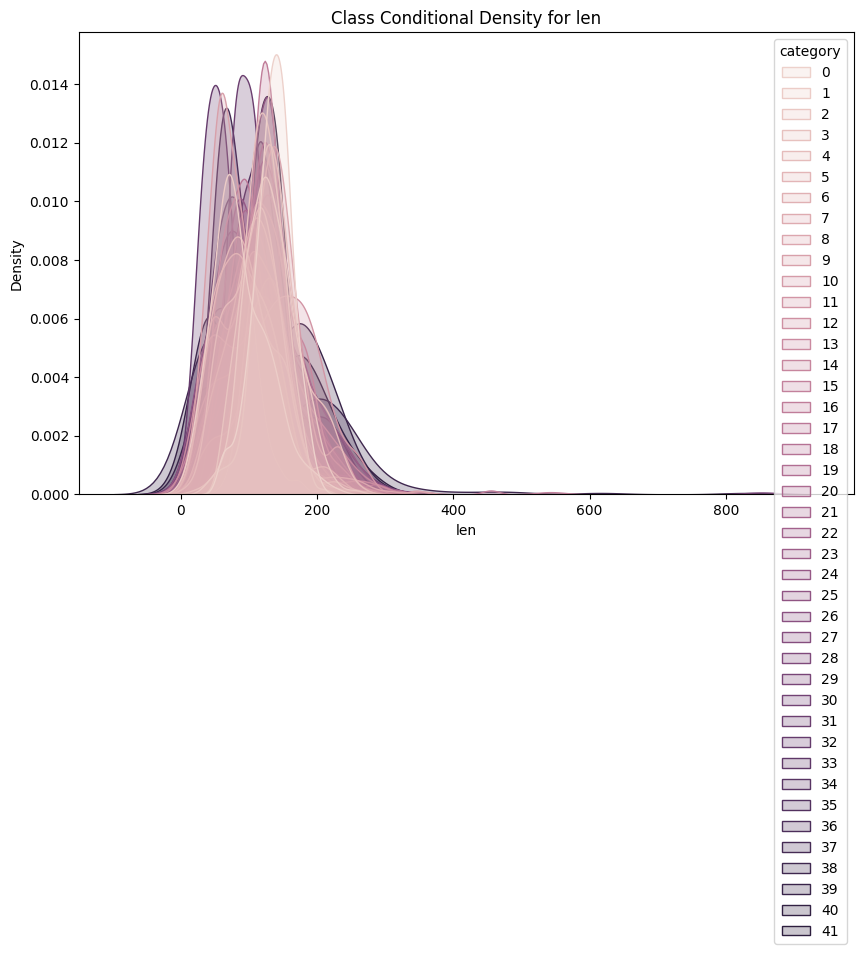

In [6]:
#A2(project data)
#Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Reading the dataset 
df = pd.read_csv('the_final_no_changes_data.csv')
# Plotting class conditional densities
for feature in df.columns[:-1]:  # Exclude the 'category' column
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=feature, hue='category', fill=True, common_norm=False)
    plt.title(f'Class Conditional Density for {feature}')
    plt.show()

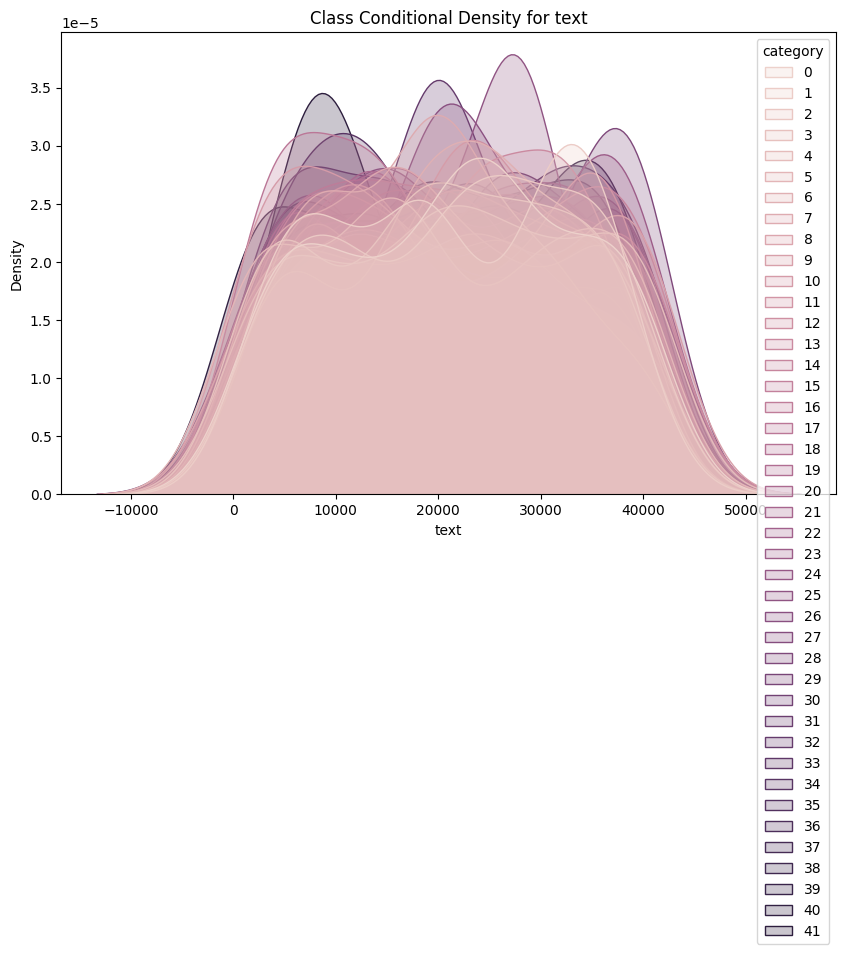

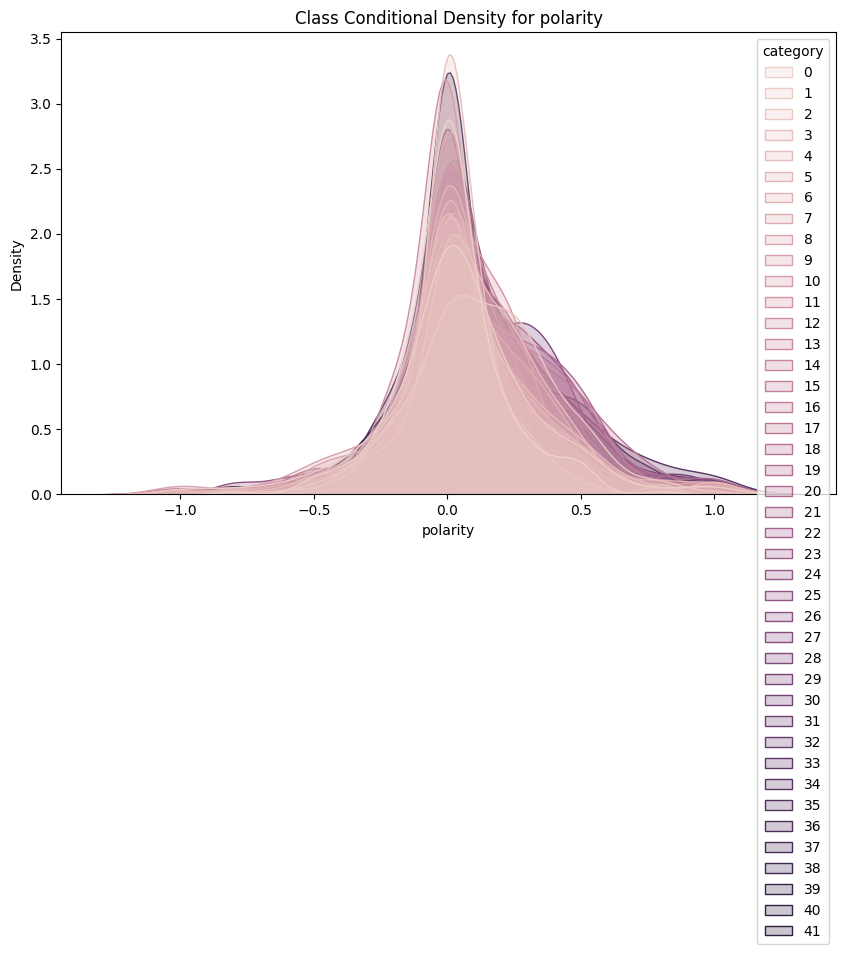

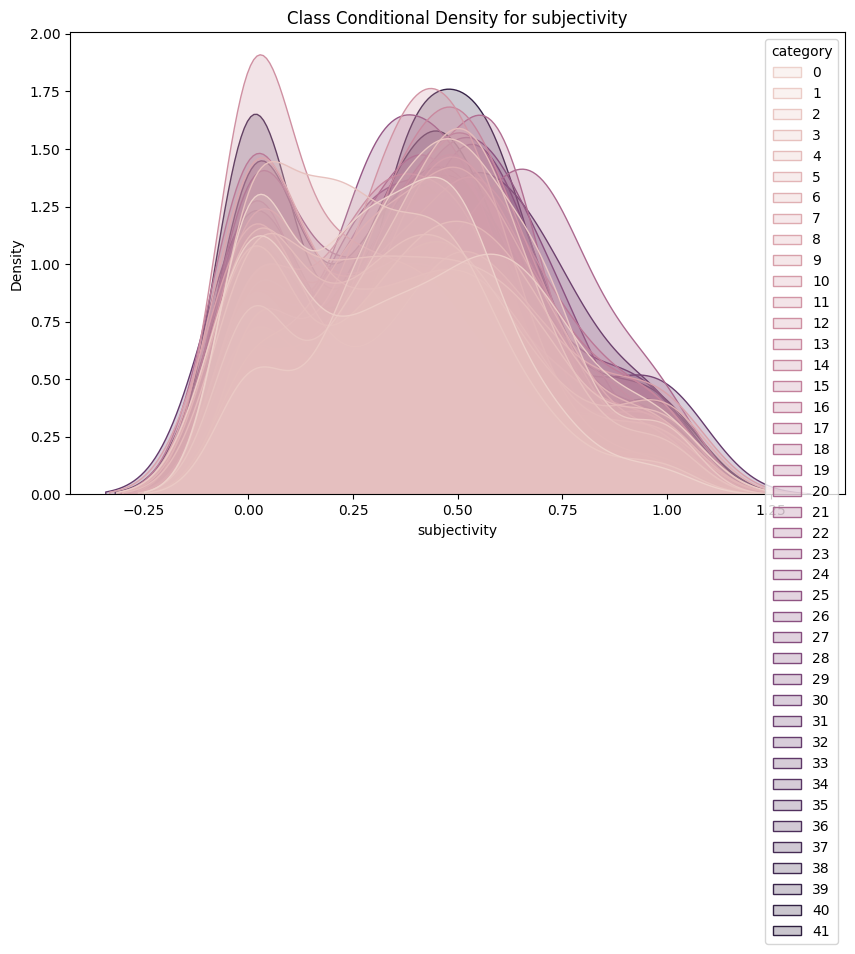

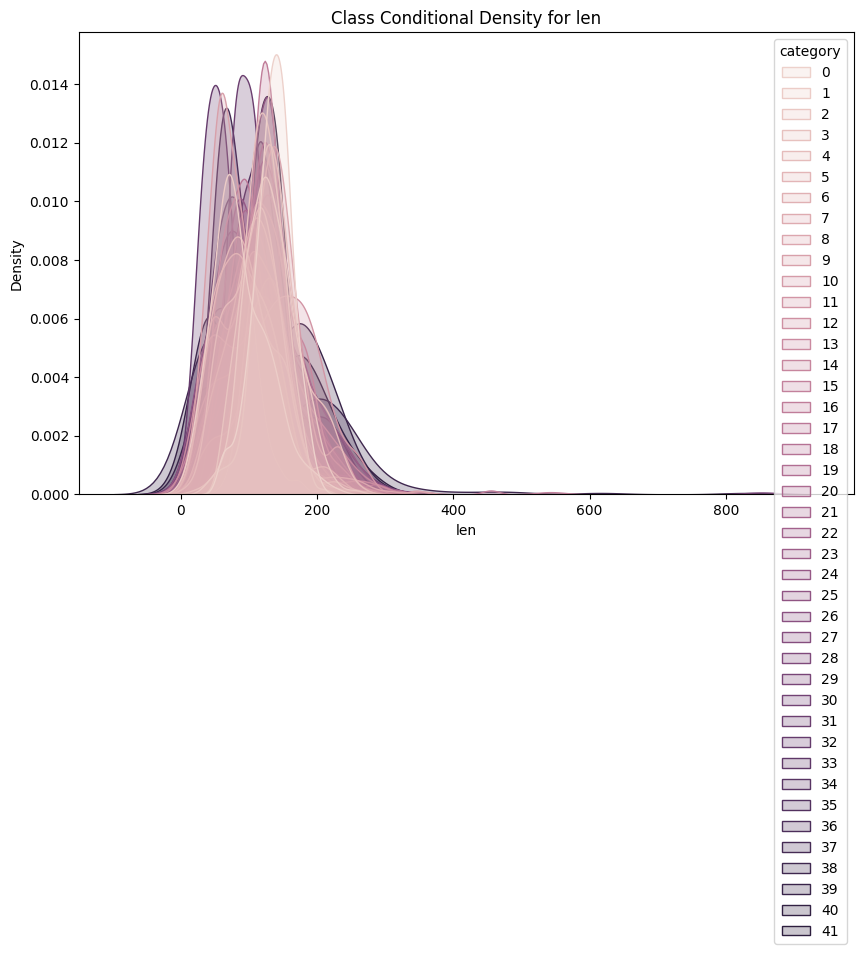

In [6]:
#A2
#Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Reading the dataset 
df = pd.read_csv('the_final_no_changes_data.csv')
# Plotting class conditional densities
for feature in df.columns[:-1]:  # Exclude the 'category' column
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=feature, hue='category', fill=True, common_norm=False)
    plt.title(f'Class Conditional Density for {feature}')
    plt.show()

In [17]:
#A3
#Importing libraries
import pandas as pd
from scipy.stats import chi2_contingency
#Importing dataset
df = pd.read_csv('lab4.csv')
# Creating a contingency table
df = pd.DataFrame(data, columns=["Age", "Income", "Student", "CreditRating", "BuysComputer"])
contingency_table = pd.crosstab(index=df["Age"], columns=[df["Income"], df["Student"], df["CreditRating"], df["BuysComputer"]])
# Performing chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
# Printing outcomes 
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")
# Setting a common significance level
alpha = 0.07
print("Significance level:", alpha)
print("Degrees of freedom:", chi2_contingency(contingency_table)[2])
print(f"P-value: {p}")
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

Chi-squared value: 25.200000000000003
P-value: 0.39495830409454513
Significance level: 0.07
Degrees of freedom: 24
P-value: 0.39495830409454513
Fail to reject the null hypothesis: There is no significant association between the variables.


In [23]:
#A4
#Importing libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Importing data
data = [
    ("<=30", "high", "no", "fair", "no"),
    ("<=30", "high", "no", "excellent", "no"),
    ("31...40", "high", "no", "fair", "yes"),
    (">40", "medium", "no", "fair", "yes"),
    (">40", "low", "yes", "fair", "yes"),
    (">40", "low", "yes", "excellent", "no"),
    ("31...40", "low", "yes", "excellent", "yes"),
    ("<=30", "medium", "no", "fair", "no"),
    ("<=30", "low", "yes", "fair", "yes"),
    (">40", "medium", "yes", "fair", "yes"),
    ("<=30", "medium", "yes", "excellent", "yes"),
    ("31...40", "medium", "no", "excellent", "yes"),
    ("31...40", "high", "yes", "fair", "yes"),
    (">40", "medium", "no", "excellent", "no"),
]
import pandas as pd
df = pd.DataFrame(data, columns=["Age", "Income", "Student", "CreditRating", "BuysComputer"])
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
X = df_encoded.drop("BuysComputer", axis=1)
y = df_encoded["BuysComputer"]
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)
#Building model
nb_model = GaussianNB()
nb_model.fit(Tr_X, Tr_y)
#Printing the results
predictions = nb_model.predict(Te_X)
accuracy = accuracy_score(Te_y, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6666666666666666


In [24]:
#A5
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#Importing dataset
df = pd.read_csv('the_final_no_changes_data.csv')
#splitting dataset
X = df.drop("category", axis=1)
y = df["category"]
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)
#building model
nb_model = GaussianNB()
nb_model.fit(Tr_X, Tr_y)
predictions = nb_model.predict(Te_X)
accuracy = accuracy_score(Te_y, predictions)
#printing results
print(f"Accuracy: {accuracy}")

Accuracy: 0.060476190476190475
